In [7]:
import sys
sys.path.append('../..')
from src import WindSpeedUnit, ForecastAPI, ForecastCurrent
import src

f = ForecastAPI()
f.latitude, f.longitude = src.GEO_COORDINATES.DUNDALK_IT.value
f.wind_speed_unit = WindSpeedUnit.METERS_PER_SECOND
f.current = [ForecastCurrent.WIND_DIRECTION_10M]

f.request()

Remaining: {'daily': 9996.0, 'hourly': 4996.0, 'minutely': 600}
API counts: 1.0


{'latitude': 53.990437,
 'longitude': -6.4023438,
 'generationtime_ms': 0.023126602172851562,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 15.0,
 'current_units': {'time': 'iso8601',
  'interval': 'seconds',
  'wind_direction_10m': 'Â°'},
 'current': {'time': '2025-02-20T19:30',
  'interval': 900,
  'wind_direction_10m': 197}}

In [3]:
import pandas as pd
pd.read_sql_query('SELECT * FROM REQUESTS', f._conn) 

id                                                url  call_weight  \
0   1  https://api.open-meteo.com/v1/forecast?current...          1.0   
1   2  https://api.open-meteo.com/v1/forecast?current...          1.0   
2   3  https://api.open-meteo.com/v1/forecast?current...          1.0   
3   4  https://api.open-meteo.com/v1/forecast?current...          1.0   

             timestamp  
0  2025-02-20 19:03:04  
1  2025-02-20 19:03:42  
2  2025-02-20 19:06:22  
3  2025-02-20 19:09:55

In [5]:
src.weather.utils.RequestLogger.queryRemaining(f._conn)

{'daily': 9996.0, 'hourly': 4996.0, 'minutely': 600}

In [17]:
url = 'https://archive-api.open-meteo.com/v1/archive?latitude=52.52&longitude=13.41&latitude=52.52&longitude=13.41&start_date=2000-02-17&end_date=2025-02-19&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,boundary_layer_height,wet_bulb_temperature_2m,total_column_integrated_water_vapour,is_day,sunshine_duration,albedo,snow_depth_water_equivalent&daily=weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration&wind_speed_unit=ms&timezone=auto'
src.weather.utils.ApiCounter.calculate_call_weight_from_url(url) #3718.842 is the answer. It's wrong though.

7437.685714285714

In [16]:
src.weather.utils.ApiCounter.parse_url_params(url)

{'start_date': '2000-02-17',
 'end_date': '2025-02-19',
 'hourly': ['temperature_2m',
  'relative_humidity_2m',
  'dew_point_2m',
  'apparent_temperature',
  'precipitation',
  'rain',
  'snowfall',
  'snow_depth',
  'weather_code',
  'pressure_msl',
  'surface_pressure',
  'cloud_cover',
  'cloud_cover_low',
  'cloud_cover_mid',
  'cloud_cover_high',
  'et0_fao_evapotranspiration',
  'vapour_pressure_deficit',
  'wind_speed_10m',
  'wind_speed_100m',
  'wind_direction_10m',
  'wind_direction_100m',
  'wind_gusts_10m',
  'soil_temperature_0_to_7cm',
  'soil_temperature_7_to_28cm',
  'soil_temperature_28_to_100cm',
  'soil_temperature_100_to_255cm',
  'soil_moisture_0_to_7cm',
  'soil_moisture_7_to_28cm',
  'soil_moisture_28_to_100cm',
  'soil_moisture_100_to_255cm',
  'boundary_layer_height',
  'wet_bulb_temperature_2m',
  'total_column_integrated_water_vapour',
  'is_day',
  'sunshine_duration',
  'albedo',
  'snow_depth_water_equivalent'],
 'daily': ['weather_code',
  'temperature_2m

In [ ]:
'''
https://archive-api.open-meteo.com/v1/archive
    ?latitude=52.52
    &longitude=13.41
    &start_date=2000-02-17
    &end_date=2025-02-19
    &hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,boundary_layer_height,wet_bulb_temperature_2m,total_column_integrated_water_vapour,is_day,sunshine_duration,albedo,snow_depth_water_equivalent
    &daily=weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
    &wind_speed_unit=ms
    &timezone=auto
'''.replace('\n', '').replace(' ', '').replace('\t', '')

'https://archive-api.open-meteo.com/v1/archive?latitude=52.52&longitude=13.41&start_date=2000-02-17&end_date=2025-02-19&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,boundary_layer_height,wet_bulb_temperature_2m,total_column_integrated_water_vapour,is_day,sunshine_duration,albedo,snow_depth_water_equivalent&daily=weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration&wind_speed_unit=ms&timezone=auto'


'https://archive-api.open-meteo.com/v1/archive?latitude=52.52&longitude=13.41&start_date=2000-02-17&end_date=2025-02-19&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,boundary_layer_height,wet_bulb_temperature_2m,total_column_integrated_water_vapour,is_day,sunshine_duration,albedo,snow_depth_water_equivalent&daily=weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,d

In [6]:
from src import WindSpeedUnit, HistoricalHourly, HistoricalAPI
import datetime as dt

f = HistoricalAPI()
dundalk_it = (53.98352, -6.391390) #https://data.mendeley.com/datasets/tm988rs48k/2
f.latitude, f.longitude = dundalk_it
f.wind_speed_unit = WindSpeedUnit.METERS_PER_SECOND
# f.current = [ForecastCurrent.WIND_SPEED_10M, ForecastCurrent.WIND_DIRECTION_10M, ForecastCurrent.TEMPERATURE_2M]
f.hourly = [HistoricalHourly.TEMPERATURE_2M,
            HistoricalHourly.RELATIVE_HUMIDITY_2M, 
            HistoricalHourly.PRECIPITATION,
            HistoricalHourly.WIND_SPEED_10M,
            HistoricalHourly.WIND_DIRECTION_10M,
            HistoricalHourly.WIND_SPEED_100M,
            HistoricalHourly.WIND_DIRECTION_100M]
f.start_date = dt.datetime(2000, 1, 1)
f.end_date = dt.datetime(2025, 2, 20) 

f.build_url()
result = f.request()


'https://archive-api.open-meteo.com/v1/archive?end_date=2025-02-20&hourly=temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,wind_direction_10m,wind_speed_100m,wind_direction_100m&latitude=53.98352&longitude=-6.39139&start_date=2000-01-01&wind_speed_unit=ms'

In [20]:
for k,v in result.items():
    print(k,end = '')
    if isinstance(v, list):
        print('',v[:5],end='')
    elif isinstance(v, dict):
        print('',list(v.keys()),end='')
    else:
        print('',v,end='')
    print()

latitude 53.954304
longitude -6.4410095
generationtime_ms 9705.280303955078
utc_offset_seconds 0
timezone GMT
timezone_abbreviation GMT
elevation 15.0
hourly_units ['time', 'temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'wind_direction_10m', 'wind_speed_100m', 'wind_direction_100m']
hourly ['time', 'temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'wind_direction_10m', 'wind_speed_100m', 'wind_direction_100m']


In [7]:
import pandas as pd
import sqlite3
from copy import deepcopy

metadata = dict()
response = deepcopy(result)

for k,v in result.items():
    if not isinstance(v, (list,dict)):
        metadata[k] = response.pop(k)

df = pd.DataFrame(response['hourly'])
for k,v in metadata.items():
    if k == 'generationtime_ms':
        continue
    df[k] = v

df = df.dropna()

In [35]:
df.to_pickle('historical.pkl')

In [6]:
import pandas as pd
import sys
sys.path.append('../..')
import src

Raw_df = pd.read_pickle('historical.pkl')
df = Raw_df.copy()
df.time = pd.to_datetime(df.time,format = '%Y-%m-%dT%H:%M').astype('str')

# df.to_csv(src.SOURCE.DATA.str+'//historical_weather_data.csv',index = False)


In [17]:
import sqlite3

'''
time                       {'str': 220345}
temperature_2m           {'float': 220345}
relative_humidity_2m     {'float': 220345}
precipitation            {'float': 220345}
wind_speed_10m           {'float': 220345}
wind_direction_10m       {'float': 220345}
wind_speed_100m          {'float': 220345}
wind_direction_100m      {'float': 220345}
latitude                 {'float': 220345}
longitude                {'float': 220345}
utc_offset_seconds         {'int': 220345}
timezone                   {'str': 220345}
timezone_abbreviation      {'str': 220345}
elevation                {'float': 220345}
'''
df = Raw_df.copy()
df.time = pd.to_datetime(df.time,format = '%Y-%m-%dT%H:%M').astype('str')
df = df.melt(id_vars = 'time latitude longitude utc_offset_seconds timezone timezone_abbreviation elevation'.split(),
        value_vars = 'temperature_2m relative_humidity_2m precipitation wind_speed_10m wind_direction_10m wind_speed_100m wind_direction_100m'.split(),
        var_name = 'parameter',
        value_name = 'value')
# make sqlite file with the above fields and datatypes. Table name is historical weather data
conn = sqlite3.connect(src.SOURCE.DATA.DB.str)

cursor = conn.cursor()
# enable Write Ahead Logging (WAL) mode
cursor.execute("PRAGMA journal_mode=WAL;")

# make if not exists
# COMMAND = '''
# CREATE TABLE IF NOT EXISTS historical_weather_data (
#     ID INTEGER PRIMARY KEY AUTOINCREMENT,
#     time TEXT,
#     temperature_2m REAL,
#     relative_humidity_2m REAL,
#     precipitation REAL,
#     wind_speed_10m REAL,
#     wind_direction_10m REAL,
#     wind_speed_100m REAL,
#     wind_direction_100m REAL,
#     latitude REAL,
#     longitude REAL,
#     utc_offset_seconds INTEGER,
#     timezone TEXT,
#     timezone_abbreviation TEXT,
#     elevation REAL
# );
# '''
COMMAND = '''
CREATE TABLE IF NOT EXISTS hourly_historical_weather_data(
    ID INTEGER PRIMARY KEY AUTOINCREMENT,
    time TEXT,
    latitude REAL,
    longitude REAL,
    utc_offset_seconds INTEGER,
    timezone TEXT,
    timezone_abbreviation TEXT,
    elevation REAL
    parameter TEXT,
    value REAL
);
'''

cursor.execute(COMMAND)
conn.commit()


In [18]:
df.to_sql('hourly_historical_weather_data', conn, if_exists='replace', index = False)

1542415

<Axes: xlabel='time'>

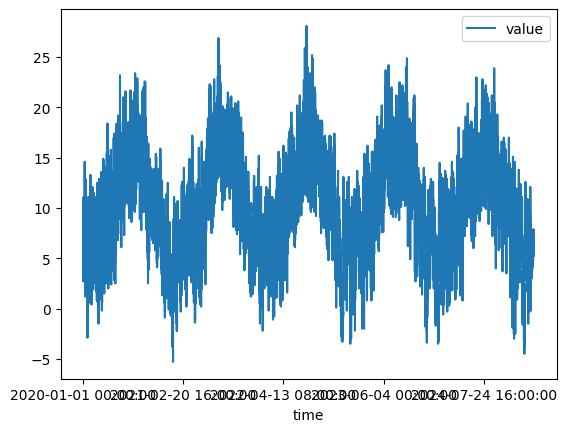